## **SENTIMENT ANALYSIS OF TWEETS FROM AIRLINE USERS**

Objectives*:

 1.To find out which airline provides the better service.

 2.Reasons for the negative reviews.

 3.Points for improvements.

 4.Applying machine Learning Model



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from wordcloud import WordCloud,STOPWORDS

In [ ]:
df=pd.read_csv("/content/Tweets.csv")

In [ ]:
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# ***Data Preprocessing***
The first step should be to check the shape of the dataframe and then check the number of null values in each column.

In this way we can get an idea of the redundant columns in the data frame depending on which columns have the highest number of null values.

In [ ]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.shape

(14640, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.describe()

,airline_sentiment_confidence,negativereason_confidence,airline_sentiment_encoded
count,11510.000000,9487.000000,11510.000000
mean,0.920596,0.705721,0.204431
std,0.149724,0.269660,0.403303
min,0.335600,0.000000,0.000000
25%,1.000000,0.636800,0.000000
50%,1.000000,0.677600,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
df.corr()

<ipython-input-123-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,airline_sentiment_confidence,negativereason_confidence,airline_sentiment_encoded
airline_sentiment_confidence,1.000000,0.563812,-0.166245
negativereason_confidence,0.563812,1.000000,-0.496843
airline_sentiment_encoded,-0.166245,-0.496843,1.000000


## **DATA CLEANING**

 *Unnecessory and insignificant columns from the data has been excluded, such as

tweet id:

airline_sentiment_gold:40 non null values/14640 entries(0.27% of data)

name

neagativereason_gold:32 non null values/14640 entries(0.22% of data)

retweet_count:

tweet_coord:

tweet_created:

tweet_created:

tweet_location user_timezone

In [ ]:
df.drop(["tweet_id","airline_sentiment_gold","name","negativereason_gold","retweet_count","tweet_coord","tweet_location","user_timezone"],axis=1,inplace=True)


In [ ]:
df.duplicated().sum()

39

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(14601, 7)

In [ ]:
df.isna().sum()

airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5444
negativereason_confidence       4100
airline                            0
text                               0
tweet_created                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14601 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14601 non-null  object 
 1   airline_sentiment_confidence  14601 non-null  float64
 2   negativereason                9157 non-null   object 
 3   negativereason_confidence     10501 non-null  float64
 4   airline                       14601 non-null  object 
 5   text                          14601 non-null  object 
 6   tweet_created                 14601 non-null  object 
dtypes: float64(2), object(5)
memory usage: 912.6+ KB


In [ ]:
df.negativereason.value_counts()

Customer Service Issue         2902
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

CHECKING OUTLIERS IN THE NUMERICAL DATA COLUMNS-"negativereason_confidence" AND "airline_sentiment_confidence"

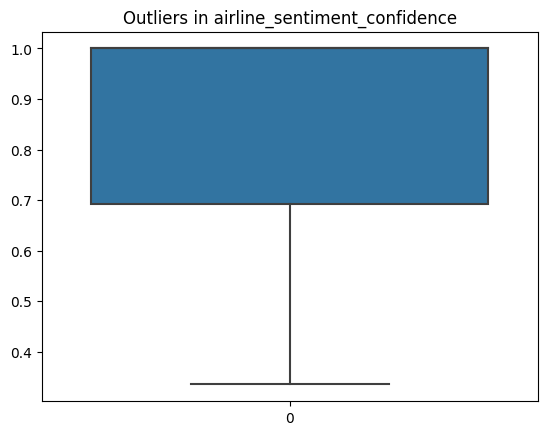

In [ ]:
sns.boxplot(df["airline_sentiment_confidence"])
plt.title("Outliers in airline_sentiment_confidence")
plt.show()

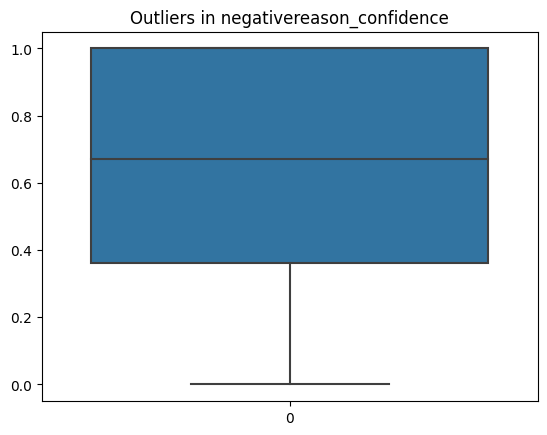

In [ ]:
sns.boxplot(df["negativereason_confidence"])
plt.title("Outliers in negativereason_confidence")
plt.show()

Preprocessing “tweet_created” date
tweet_created is in object format need to change it to date format


In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [ ]:
df['tweet_created'].min()

Timestamp('2015-02-16 23:36:05-0800', tz='pytz.FixedOffset(-480)')

In [ ]:
df['tweet_created'].max()

Timestamp('2015-02-24 11:53:37-0800', tz='pytz.FixedOffset(-480)')

Save the cleaned file

In [ ]:
df.to_csv

<bound method NDFrame.to_csv of       airline_sentiment  airline_sentiment_confidence          negativereason  \
0               neutral                        1.0000                     NaN   
1              positive                        0.3486                     NaN   
2               neutral                        0.6837                     NaN   
3              negative                        1.0000              Bad Flight   
4              negative                        1.0000              Can't Tell   
...                 ...                           ...                     ...   
14635          positive                        0.3487                     NaN   
14636          negative                        1.0000  Customer Service Issue   
14637           neutral                        1.0000                     NaN   
14638          negative                        1.0000  Customer Service Issue   
14639           neutral                        0.6771                     NaN

In [ ]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created
0,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00
1,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00
2,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00


In [ ]:
df.negativereason.value_counts()

Customer Service Issue         2902
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [ ]:
df.shape

(14601, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14601 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   airline_sentiment             14601 non-null  object                                
 1   airline_sentiment_confidence  14601 non-null  float64                               
 2   negativereason                9157 non-null   object                                
 3   negativereason_confidence     10501 non-null  float64                               
 4   airline                       14601 non-null  object                                
 5   text                          14601 non-null  object                                
 6   tweet_created                 14601 non-null  datetime64[ns, pytz.FixedOffset(-480)]
dtypes: datetime64[ns, pytz.FixedOffset(-480)](1), float64(2), object(4)
memory us

In [ ]:
df.negativereason.unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

DATA VISUALISATION-EDA
counting types of sentiments

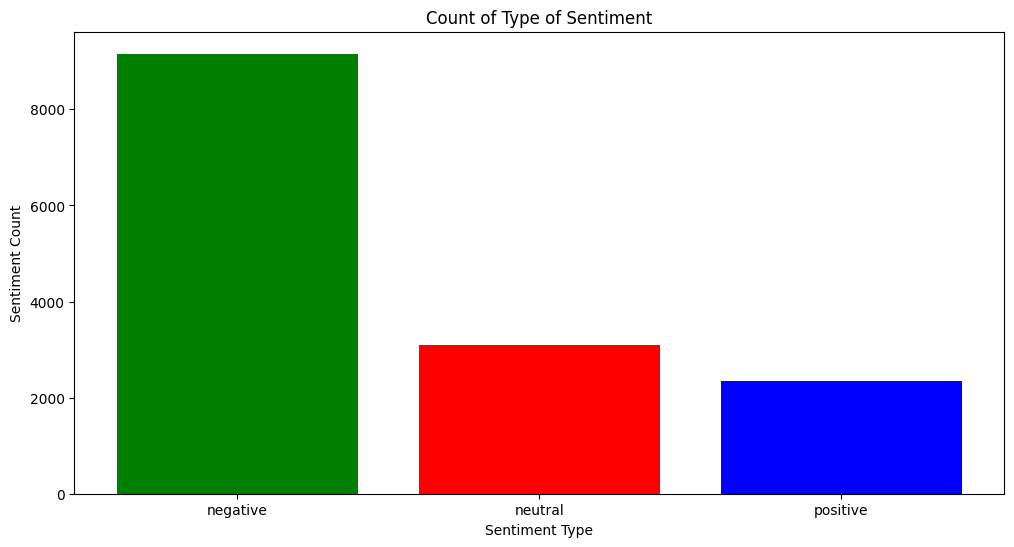

In [ ]:
counter = df.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['green','red','blue'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')
plt.show()

In [ ]:
df.airline_sentiment.value_counts()

negative    9157
neutral     3091
positive    2353
Name: airline_sentiment, dtype: int64

Airline sentiments for each **airline**


Firstly lets calculate the total number of tweets for each airline
Then, we are going to get the barplots for each airline with respect to sentiments of tweets (positive,negative or neutral).
This will give us a clear idea about the airline sentiments.


Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2720
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


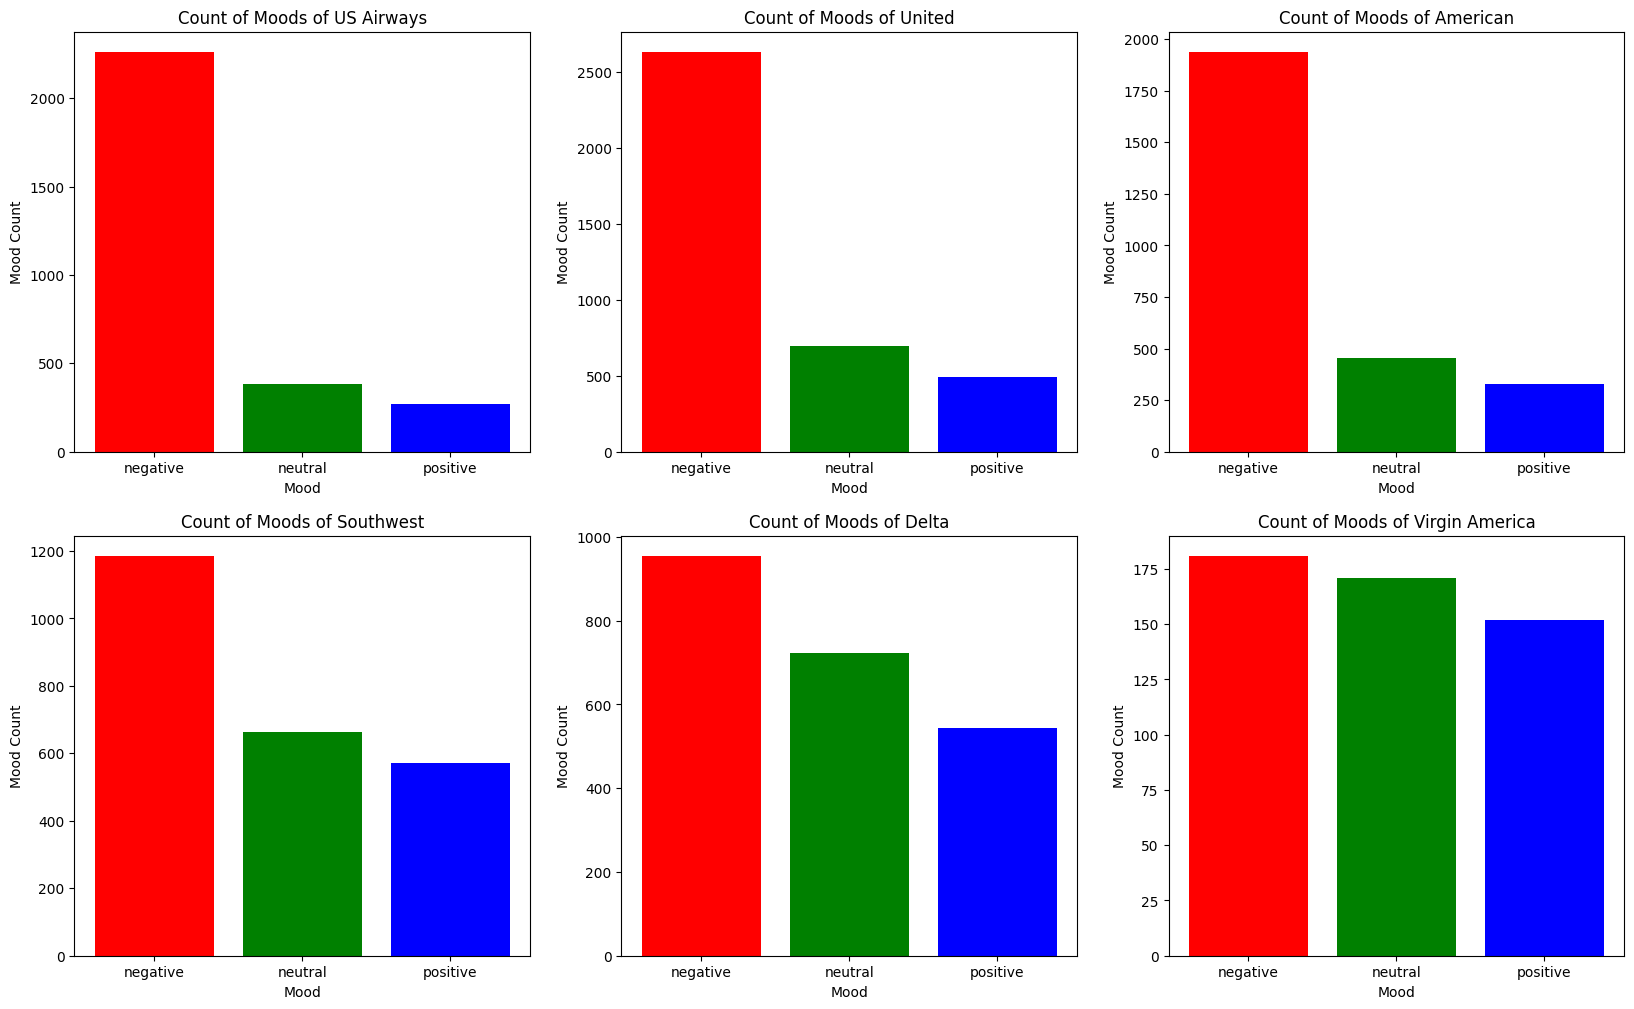

In [ ]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(20, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

<Axes: ylabel='airline'>

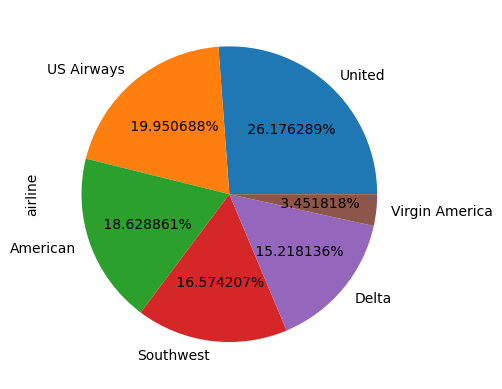

In [ ]:
df.airline.value_counts().plot(kind='pie',autopct='% 0f%%')

1.United has recorded the highest number of reviews

2.Virgin America has the lowest number of reviews

3.United, US Airways, American substantially get negative reactions.

4.Tweets for Virgin America are the most balanced.

            Percent Negative
American            0.712868
Delta               0.429793
Southwest           0.490083
US Airways          0.776862
United              0.688906
Virgin              0.359127


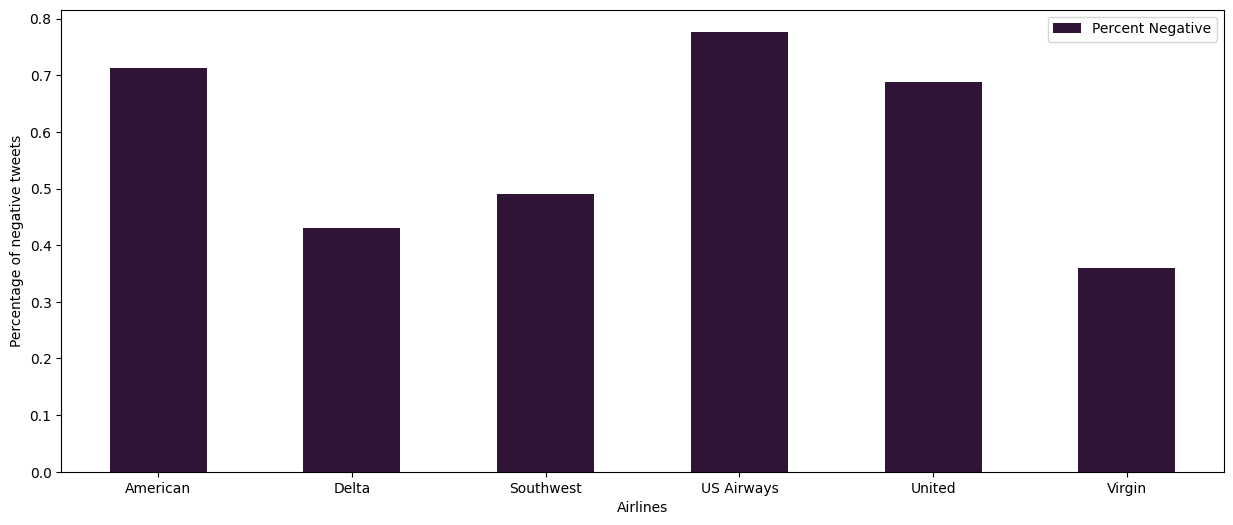

In [ ]:
neg_tweets = df.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = df.groupby(['airline'])['airline_sentiment'].count()

my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
ax = perc.plot(kind = 'bar', rot=0, colormap = 'twilight_shifted_r', figsize = (15,6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

<Axes: xlabel='airline'>

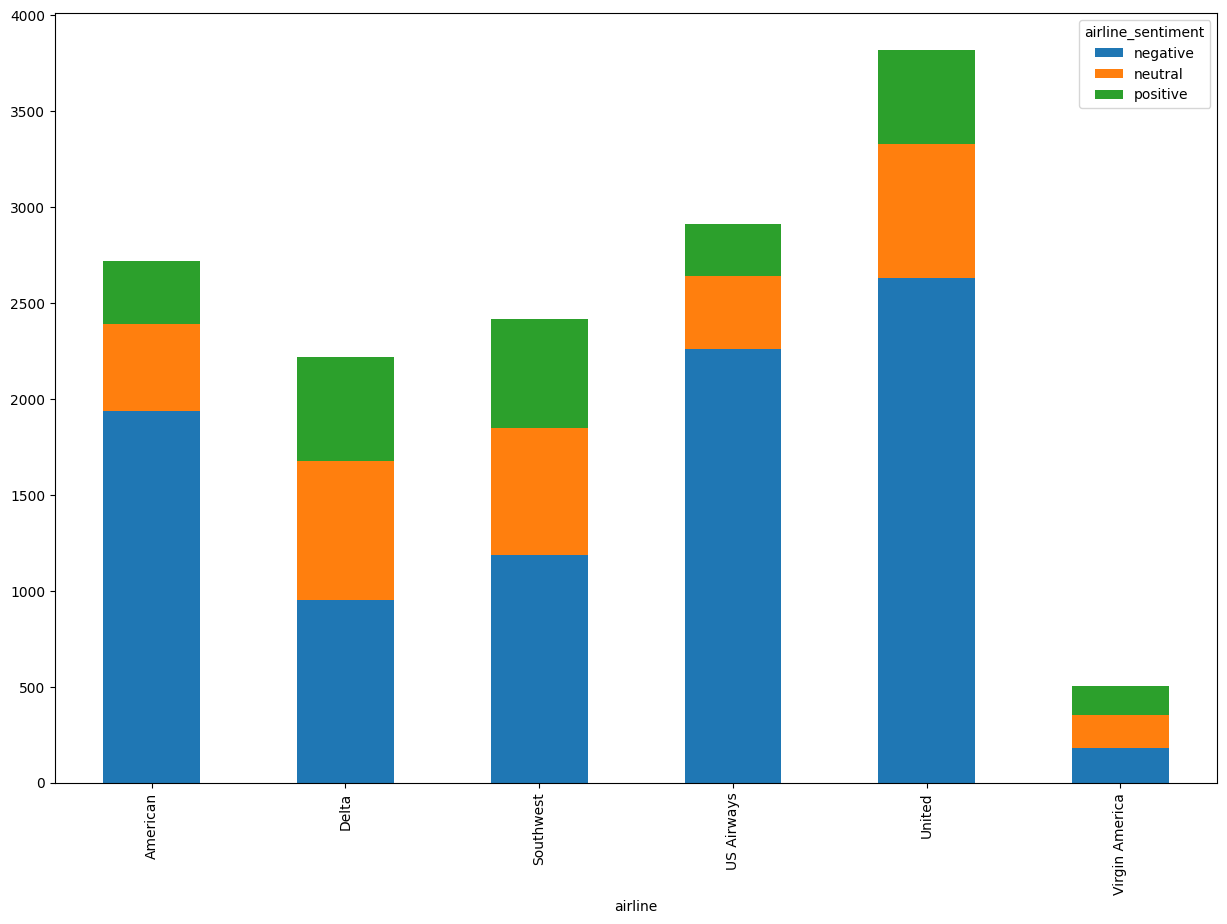

In [ ]:
figure_2 = df.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [ ]:
print(figure_2)

airline         airline_sentiment
American        negative             1939
                neutral               455
                positive              326
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


Reasons for negative reviews.

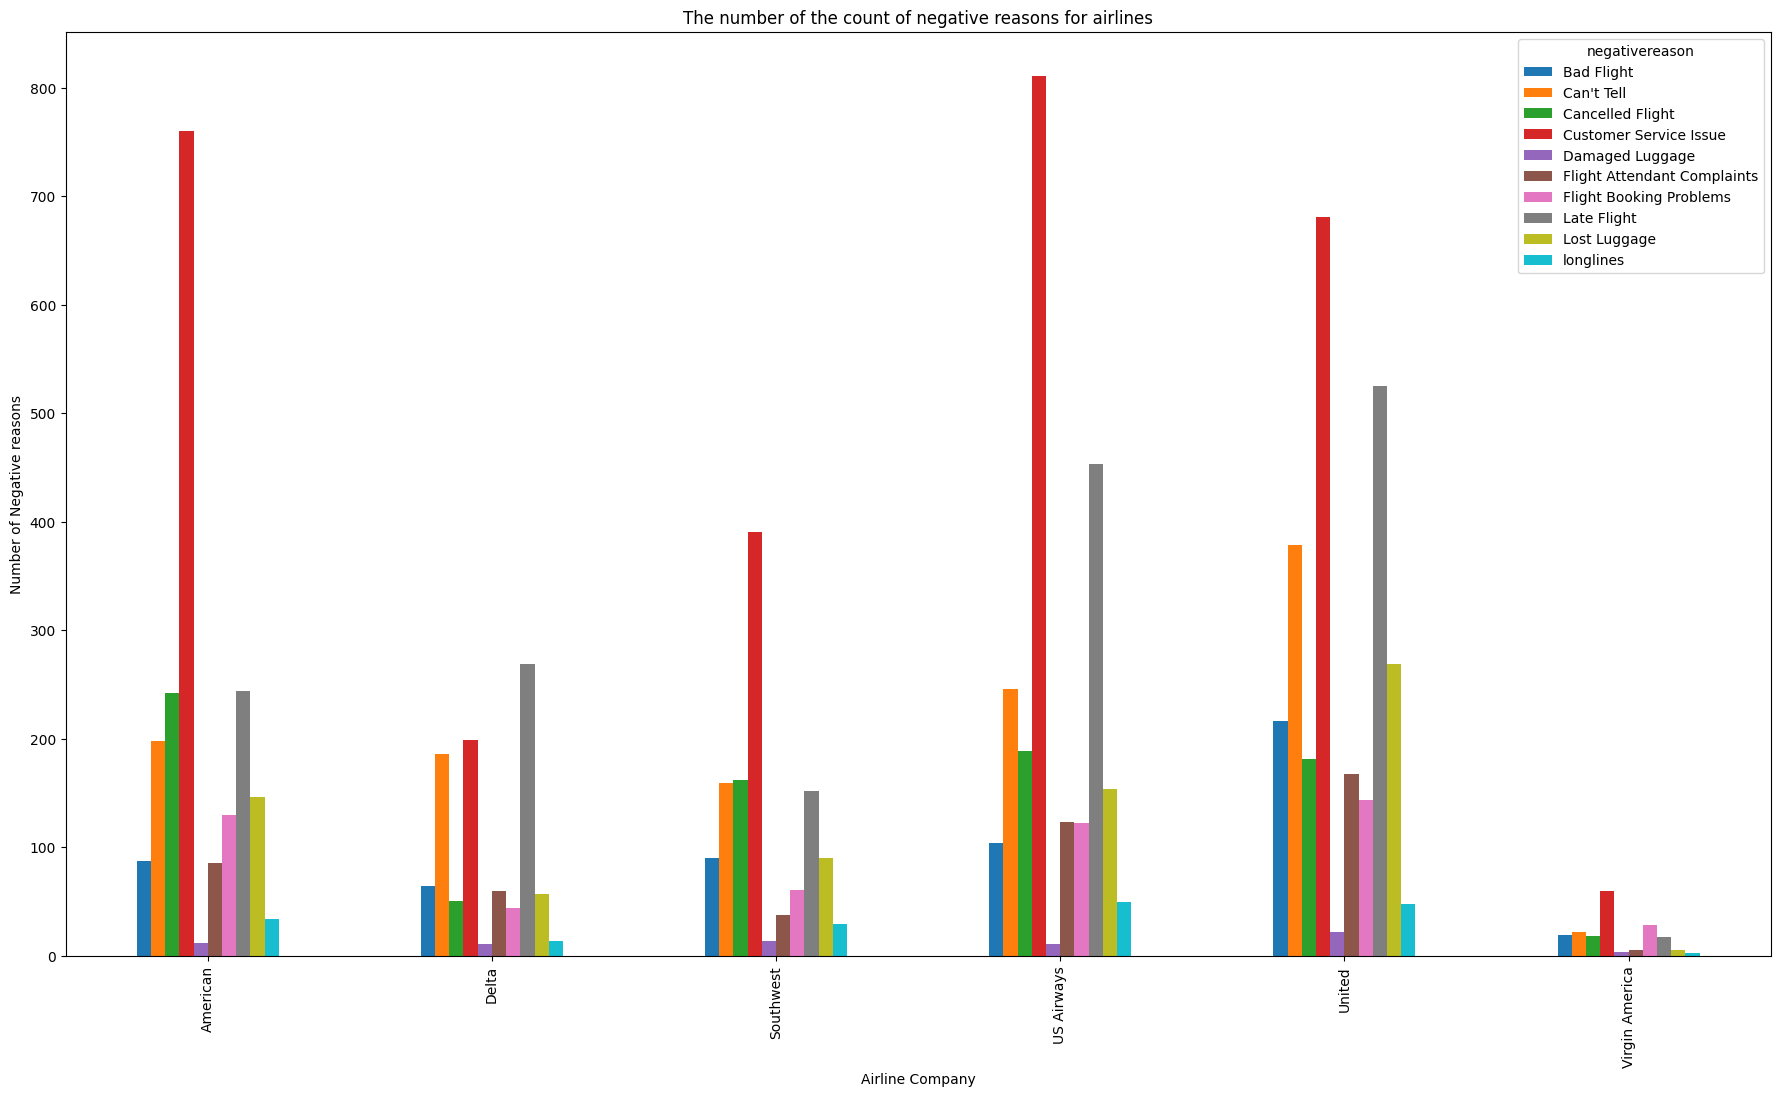

In [ ]:
negative_reasons = df.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the count of negative reasons for airlines")
plt.show()

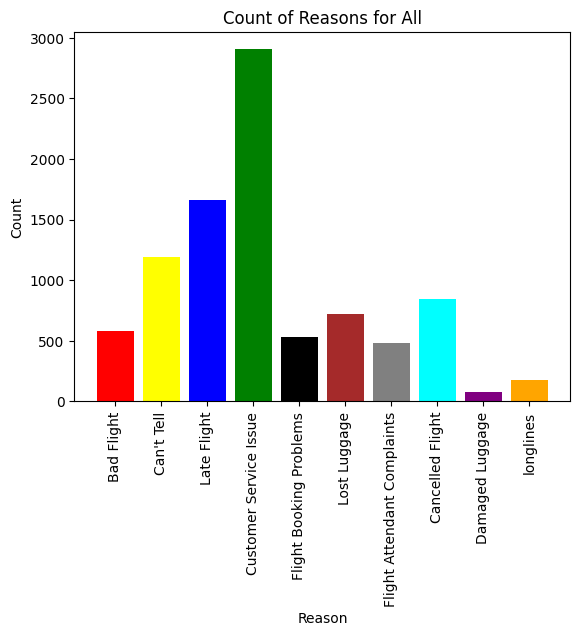

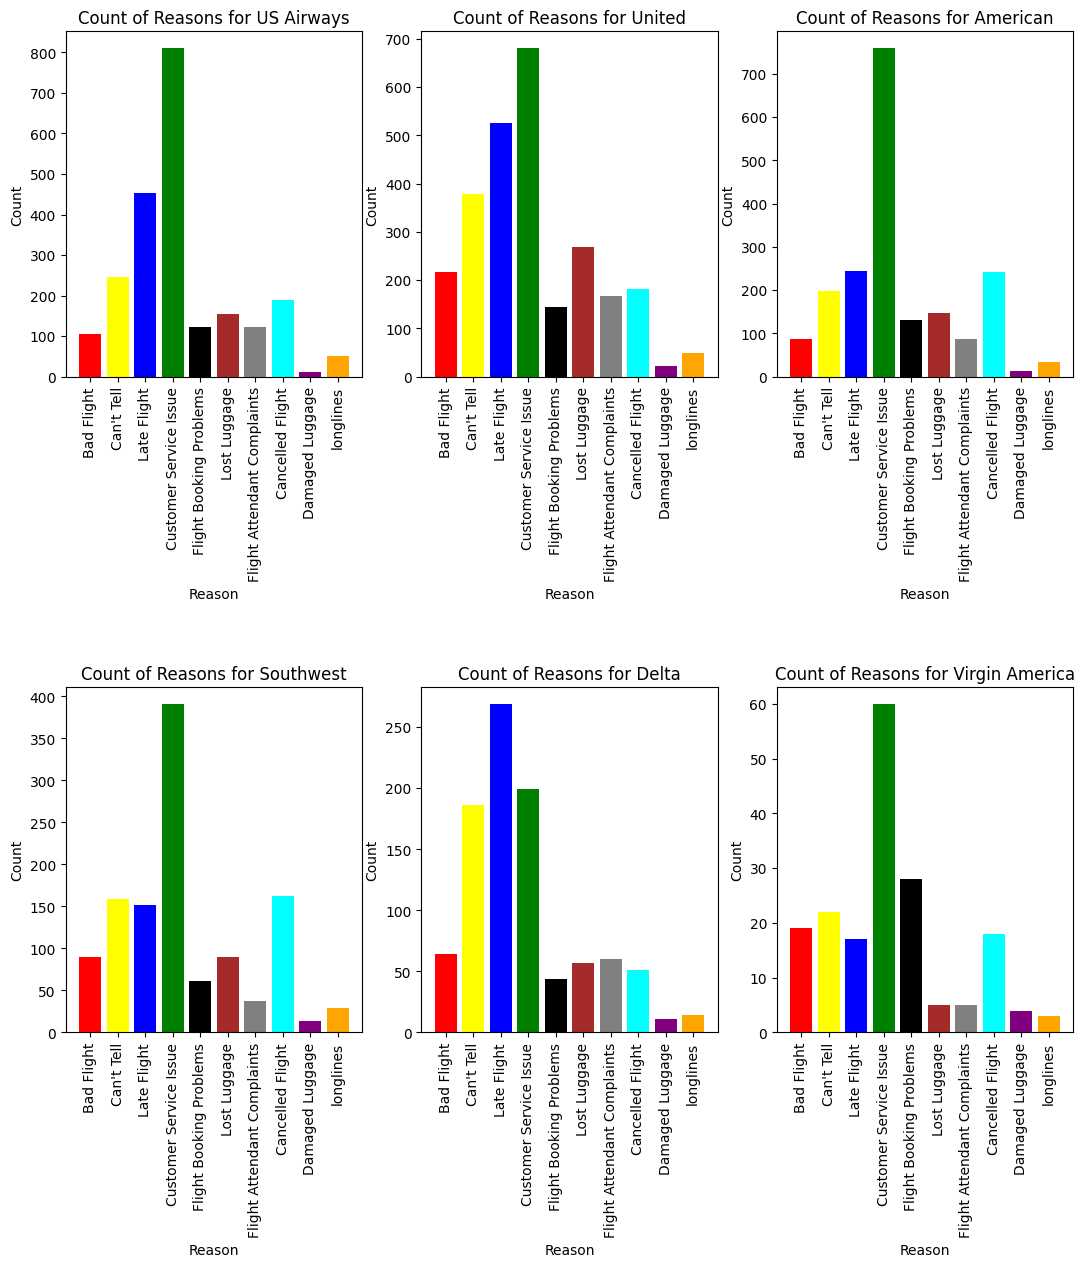

In [ ]:
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):

    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

1.Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America

2.Late Flight is the main negative reason for Delta

3.Interestingly, Virgin America has the least count of negative reasons (all less than 60)

4.Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)

# Wordcloud

Wordcloud is a great tool for visualizing nlp data. The larger the words in the wordcloud image , the more is the frequency of that word in our text data.
The goal is to firstly get an idea of the most frequent words in negative tweets and
Get idea about most frequent words in positive tweets.




Word cloud for positive tweets

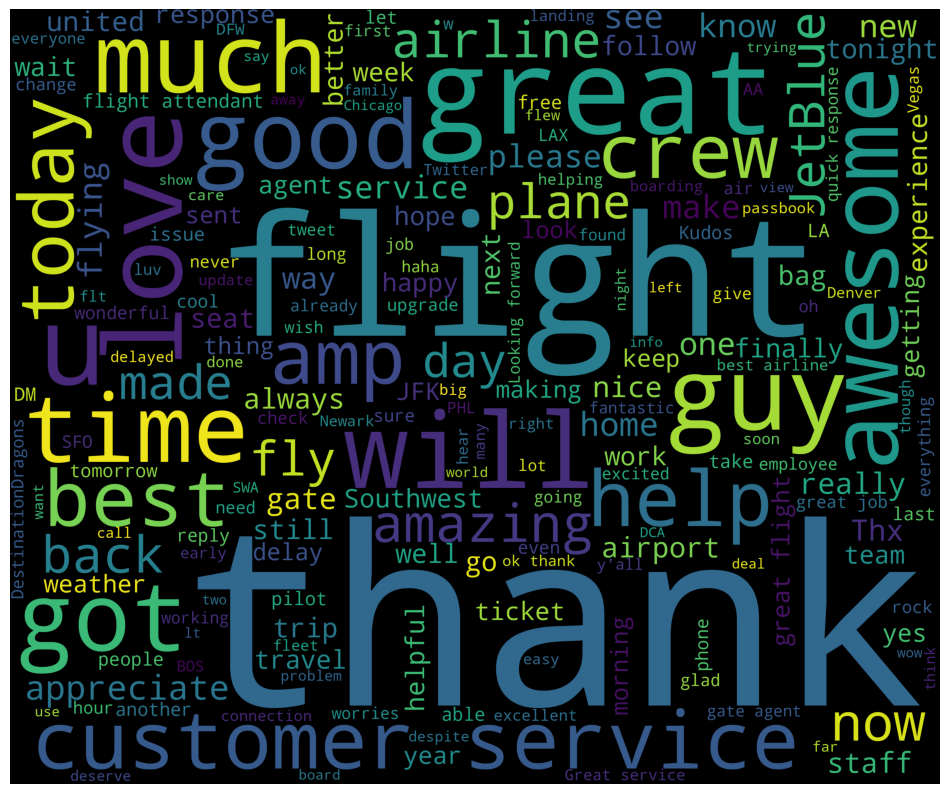

In [ ]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Wordcloud for Negative sentiments of tweets

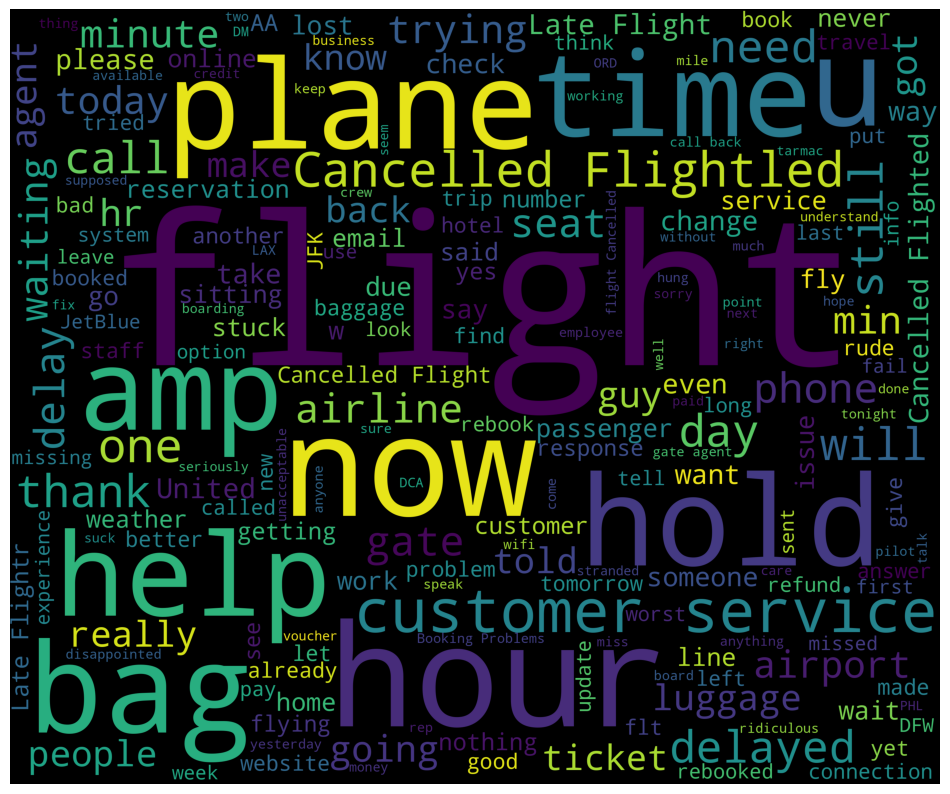

In [ ]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Dropping the rows with neutral sentiments


In [ ]:
df.drop(df.loc[df['airline_sentiment']=='neutral'].index, inplace=True)



label encoding on airline_sentiment

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['airline_sentiment'])

df['airline_sentiment_encoded'] = le.transform(df['airline_sentiment'])
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created,airline_sentiment_encoded
1,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,1
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,0
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,0
5,negative,1.0000,Can't Tell,0.6842,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33-08:00,0
6,positive,0.6745,NaN,0.0000,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57-08:00,1


Preprocessing the tweet text data.

Now, we will clean the tweet text data and apply classification algorithms on it

In [ ]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [ ]:
nltk.download('stopwords')
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vectorization

In [ ]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [ ]:
x = df.clean_tweet
y = df.airline_sentiment

print(len(x), len(y))

11510 11510


The data is split in the standard 80,20 ratio


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8632 8632
2878 2878


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [ ]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [ ]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

# Machine Learning Model Building

In [ ]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

In [ ]:
#accuracy score
accuracy_score(y_test,pred)

0.9075747046560111

In [ ]:
#building confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[2179,  122],
       [ 144,  433]])

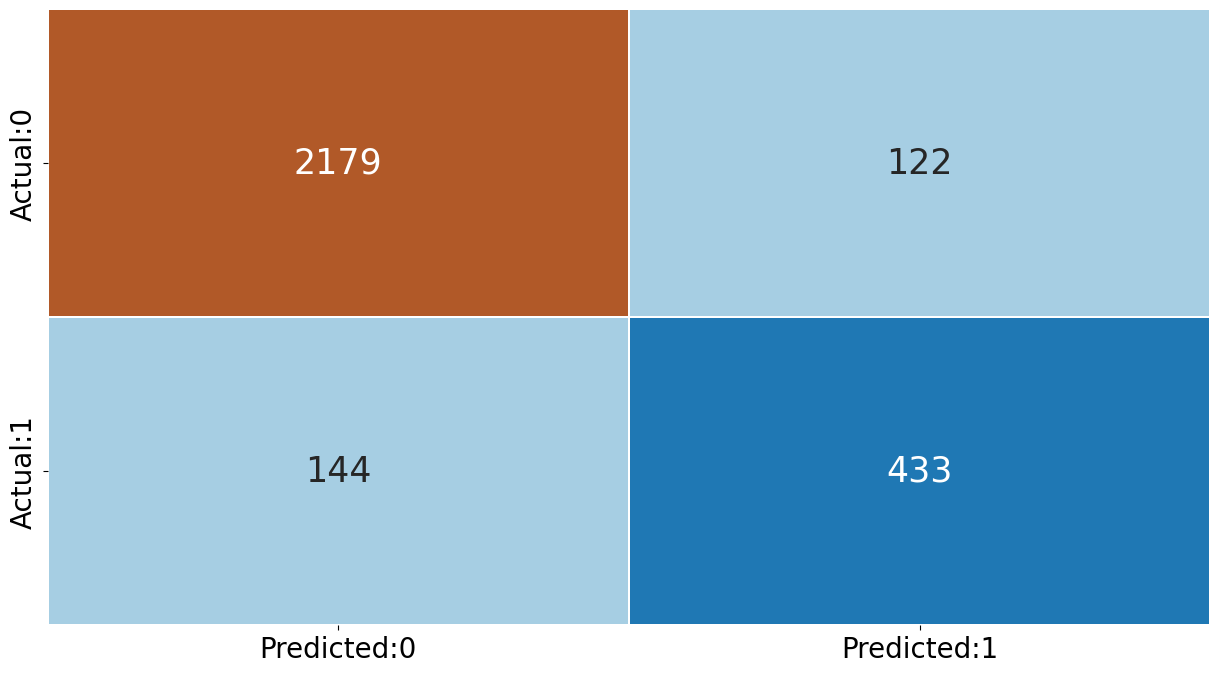

In [ ]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.94      0.95      0.94      2301
    positive       0.78      0.75      0.77       577

    accuracy                           0.91      2878
   macro avg       0.86      0.85      0.85      2878
weighted avg       0.91      0.91      0.91      2878



We have plotted the confusion matrix for predicted sentiments and actual sentiments (negative and positive).
SVM Classifier gives us the best accuracy score i.e 91% precision scores according to the classification report.
The confusion matrix shows the TP,TN,FP,FN for sentiments(negative, positive)